# China Renewable Energy Progress

In [ ]:
# Importing libraries used for the analysis
import pandas as pd
import numpy as np

import plotly.offline as pyo
import plotly.graph_objs as go

# Using latest version of statsmodel 0.9.0 (otherwise get errors during SARIMAX fit)
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.tsa.api as smt
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error

from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

### Loading data

In [ ]:
import pandas as pd

historical_data = pd.read_csv('/content/China.csv')

In [ ]:
historical_data

,Entity,Date,Renewables
0,China,1965,4.253407
1,China,1966,3.983123
2,China,1967,3.818398
3,China,1968,4.458871
4,China,1969,3.727402
5,China,1970,3.009592
6,China,1971,3.070405
7,China,1972,3.227597
8,China,1973,3.417015
9,China,1974,3.749355


In [ ]:
historical_data['Date'] = historical_data['Date'].astype(str) + '-12-31'

# Step 2: Convert 'Full_Date' to datetime
historical_data['Date'] = pd.to_datetime(historical_data['Date'], format='%Y-%m-%d')

In [ ]:
historical_data

,Entity,Date,Renewables
0,China,1965-12-31,4.253407
1,China,1966-12-31,3.983123
2,China,1967-12-31,3.818398
3,China,1968-12-31,4.458871
4,China,1969-12-31,3.727402
5,China,1970-12-31,3.009592
6,China,1971-12-31,3.070405
7,China,1972-12-31,3.227597
8,China,1973-12-31,3.417015
9,China,1974-12-31,3.749355


In [ ]:
# Set Date column to datetime for time series
historical_data['Date'] = pd.to_datetime(historical_data['Date'],infer_datetime_format=True)

# Data file is sorted from most recent date to the past so sorting by date to go the other way around
historical_data = historical_data.sort_values(by='Date', ascending=True)

# Resetting the index due to the sort_value change
historical_data = historical_data.reset_index(drop = True)

# Dropping all columns except for the Closing Price
historical_data = historical_data.drop(columns=['Entity'])

# historical_data = historical_data.drop(columns=['Probable_MW_Capacity'])

# Setting the Date as the index
historical_data = historical_data.set_index('Date')

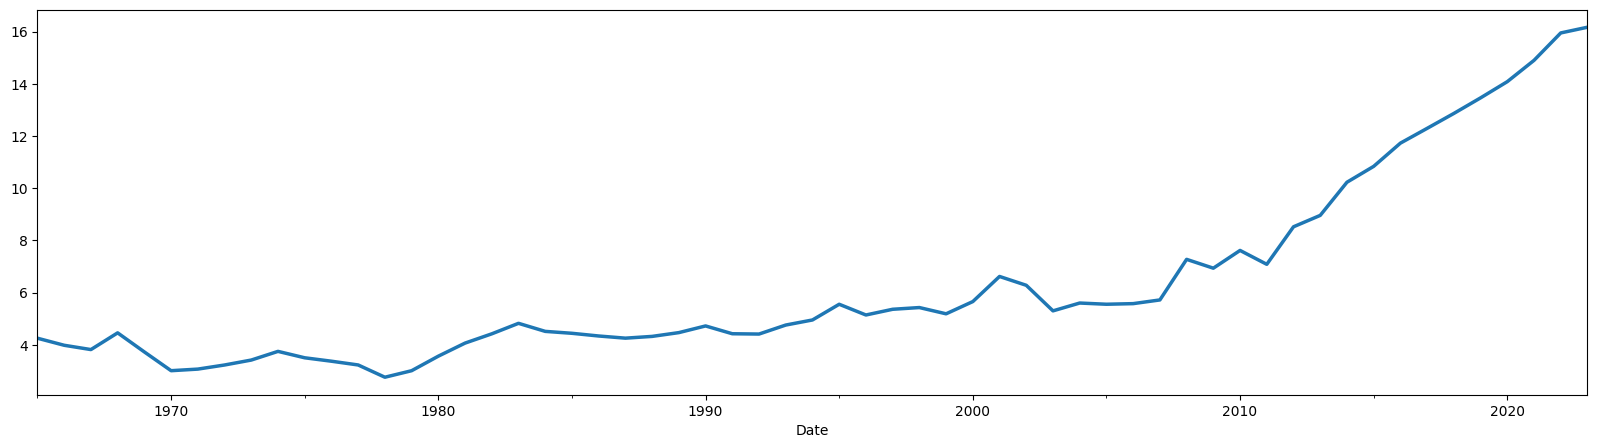

In [ ]:
historical_data['Renewables'].plot(lw=2.5, figsize=(20,5));

In [ ]:
historical_data

,Renewables
Date,
1965-12-31,4.253407
1966-12-31,3.983123
1967-12-31,3.818398
1968-12-31,4.458871
1969-12-31,3.727402
1970-12-31,3.009592
1971-12-31,3.070405
1972-12-31,3.227597
1973-12-31,3.417015


In [ ]:
df = historical_data.loc['1965--12-31':]

In [ ]:
print(df.isnull().sum())
df = df.dropna()

Renewables    0
dtype: int64


In [ ]:
df

,Renewables
Date,
1965-12-31,4.253407
1966-12-31,3.983123
1967-12-31,3.818398
1968-12-31,4.458871
1969-12-31,3.727402
1970-12-31,3.009592
1971-12-31,3.070405
1972-12-31,3.227597
1973-12-31,3.417015


### using arima to predict

In [ ]:
import warnings
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

def evaluate_arima_model(X, arima_order):
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    predictions = list()
    try:
        for t in range(len(test)):
            model = ARIMA(history, order=arima_order)
            model_fit = model.fit()
            yhat = model_fit.forecast()[0]
            predictions.append(yhat)
            history.append(test[t])
        error = mean_squared_error(test, predictions)
    except Exception as e:
        print('Error on ARIMA{}: {}'.format(arima_order, str(e)))
        return float("inf")
    return error

def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                mse = evaluate_arima_model(dataset, order)
                if mse < best_score:
                    best_score, best_cfg = mse, order
                print('ARIMA%s MSE=%.3f' % (order, mse))
    if best_cfg is not None:
        print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
    else:
        print('No valid model was found.')

# Example usage
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")

evaluate_models(df.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=33.346
ARIMA(0, 0, 1) MSE=11.888
ARIMA(0, 0, 2) MSE=4.150
ARIMA(0, 1, 0) MSE=0.599
ARIMA(0, 1, 1) MSE=0.598
ARIMA(0, 1, 2) MSE=0.580
ARIMA(0, 2, 0) MSE=0.821
ARIMA(0, 2, 1) MSE=0.401
ARIMA(0, 2, 2) MSE=0.422
ARIMA(1, 0, 0) MSE=0.672
ARIMA(1, 0, 1) MSE=0.675
ARIMA(1, 0, 2) MSE=0.642
ARIMA(1, 1, 0) MSE=0.569
ARIMA(1, 1, 1) MSE=0.520
ARIMA(1, 1, 2) MSE=0.531
ARIMA(1, 2, 0) MSE=0.488
ARIMA(1, 2, 1) MSE=0.408
ARIMA(1, 2, 2) MSE=0.415
ARIMA(2, 0, 0) MSE=0.649
ARIMA(2, 0, 1) MSE=0.744
ARIMA(2, 0, 2) MSE=0.638
ARIMA(2, 1, 0) MSE=0.539
ARIMA(2, 1, 1) MSE=0.556
ARIMA(2, 1, 2) MSE=0.520
ARIMA(2, 2, 0) MSE=0.555
ARIMA(2, 2, 1) MSE=0.446
ARIMA(2, 2, 2) MSE=0.443
Best ARIMA(0, 2, 1) MSE=0.401


In [ ]:
%%time

# Instantiating the model using SARIMAX, the optimal p, d, q values, and a seasonal order based on 52 .
model = sm.tsa.statespace.SARIMAX(historical_data['Renewables'],
                                order=(0, 2, 1),
                                seasonal_order=(0, 0, 0, 0),
                                enforce_stationarity=True,
                                enforce_invertibility=False)

# Fitting the model
SARIMAX_results = model.fit()

CPU times: user 69.1 ms, sys: 0 ns, total: 69.1 ms
Wall time: 22.5 ms


In [ ]:
# Getting model's predictions of the in-sample data, rounding to two decimal places for price.
SARIMAX_predictions = round(SARIMAX_results.predict(), 0)

# Creating a dataframe of the date index and predictions
SARIMAX_preds = pd.DataFrame(list(zip(list(SARIMAX_predictions.index),list(SARIMAX_predictions))),
                             columns=['Date','Predictedcount']).set_index('Date')

# Merging the original dataframe with predictions for comparison
SARIMAX_predicted_df = pd.merge(historical_data[1:], SARIMAX_preds, left_index=True, right_index=True)

SARIMAX_predicted_df.head()

,Renewables,Predictedcount
Date,,
1966-12-31,3.983123,6.0
1967-12-31,3.818398,4.0
1968-12-31,4.458871,4.0
1969-12-31,3.727402,5.0
1970-12-31,3.009592,4.0


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Check for NaN values in the DataFrame
print(SARIMAX_predicted_df.isna().sum())

# Drop rows with NaN values
SARIMAX_predicted_df = SARIMAX_predicted_df.dropna()

# Calculate Mean Squared Error and Root Mean Squared Error
mse = mean_squared_error(SARIMAX_predicted_df['Renewables'], SARIMAX_predicted_df['Predictedcount'])
rmse = np.sqrt(mse)

# Print the results
print("\tMean Squared Error:", mse)
print("\tRoot Mean Squared Error:", rmse)


Renewables        0
Predictedcount    0
dtype: int64
	Mean Squared Error: 0.45145634963581677
	Root Mean Squared Error: 0.6719050153375973


In [ ]:

SARIMAX_forecast = round(SARIMAX_results.forecast(steps = 5), 0)


In [ ]:
SARIMAX_forecast

,predicted_mean
2024-12-31,17.0
2025-12-31,17.0
2026-12-31,18.0
2027-12-31,19.0
2028-12-31,19.0


In [ ]:
idx = pd.date_range('2024-12-31',periods=5, freq='Y')

SARIMAX_forecast = pd.DataFrame(list(zip(list(idx),list(SARIMAX_forecast))),
                             columns=['Date','ForecastCount']).set_index('Date')

SARIMAX_forecast.head()

,ForecastCount
Date,
2024-12-31,17.0
2025-12-31,17.0
2026-12-31,18.0
2027-12-31,19.0
2028-12-31,19.0


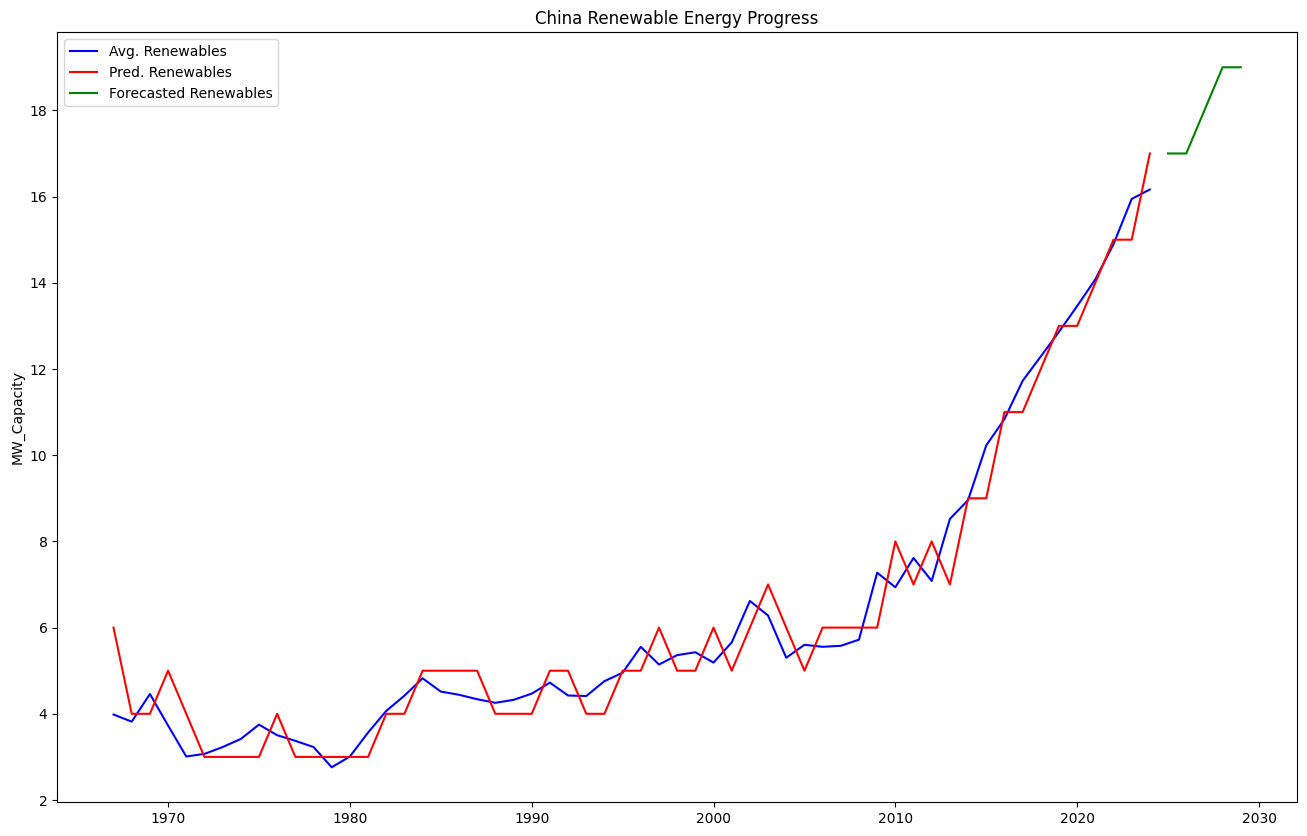

In [ ]:
# Matplotlib Plot for Notebook

fig=plt.figure(figsize=[16,10])
fig.show()
ax=fig.add_subplot(111)

ax.plot(SARIMAX_predicted_df['Renewables'],c='b',label='Avg. Renewables')
ax.plot(SARIMAX_predicted_df['Predictedcount'],c='r', label='Pred. Renewables')
ax.plot(SARIMAX_forecast['ForecastCount'],c='g', label='Forecasted Renewables')

plt.legend(loc='best')
plt.ylabel('MW_Capacity')
plt.title('China Renewable Energy Progress')
plt.draw()

In [ ]:
trace0 = go.Scatter(
    x = SARIMAX_predicted_df.index,
    y = SARIMAX_predicted_df['Renewables'],
    mode = 'lines',
    name = 'Renewables'
)
trace1 = go.Scatter(
    x = SARIMAX_predicted_df.index,
    y = SARIMAX_predicted_df['Predictedcount'],
    mode = 'lines',
    name = 'Predicted Renewables'
)
trace2 = go.Scatter(
    x = SARIMAX_forecast.index,
    y = SARIMAX_forecast['ForecastCount'],
    mode = 'lines',
    name = 'Forecast Renewables'
)
data = [trace0, trace1, trace2]

layout = go.Layout(
    title = 'China Renewable Energy Progress',
    xaxis = dict(title = 'Date'),
    yaxis = dict(title = 'Renewables')
)

fig = go.Figure(data = data, layout = layout)

pyo.plot(fig)

'temp-plot.html'

In [ ]:
import plotly.graph_objs as go
import plotly.offline as pyo

# Define your traces
trace0 = go.Scatter(
    x=SARIMAX_predicted_df.index,
    y=SARIMAX_predicted_df['Renewables'],
    mode='lines',
    name='Renewables'
)

trace1 = go.Scatter(
    x=SARIMAX_predicted_df.index,
    y=SARIMAX_predicted_df['Predictedcount'],
    mode='lines',
    name='Predicted Renewables'
)

trace2 = go.Scatter(
    x=SARIMAX_forecast.index,
    y=SARIMAX_forecast['ForecastCount'],
    mode='lines',
    name='Forecast Renewables'
)

data = [trace0, trace1, trace2]

# Customize the layout to show all dates
layout = go.Layout(
    title='China Renewable Energy Progress',
    xaxis=dict(
        title='Date',
        tickmode='linear',        # Ensure ticks are placed at regular intervals
        dtick='D1',               # Set the interval to one day (adjust if needed)
        tickangle=45,             # Rotate tick labels for better readability
        tickformat='%Y-%m-%d',    # Format the date labels (e.g., 2024-04-27)
        ticklabelmode='period'    # Ensure full date labels are shown
    ),
    yaxis=dict(title='Renewables'),
    autosize=False,
    width=1200,                   # Increase width to accommodate more labels
    height=600
)

fig = go.Figure(data=data, layout=layout)

# Render the plot
pyo.plot(fig)


'temp-plot.html'